In [6]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from skimage import io
import math

In [7]:
image = io.imread('../doc/Lepton_Capture.tiff')

In [8]:
print(image.shape)

(196, 120, 160)


In [12]:
image[0]

array([[29993, 29984, 29966, ..., 29912, 29906, 29914],
       [30001, 29976, 29972, ..., 29914, 29923, 29929],
       [29982, 29974, 29982, ..., 29916, 29906, 29933],
       ...,
       [30113, 30062, 30068, ..., 29862, 29891, 29893],
       [30093, 30068, 30081, ..., 29875, 29873, 29902],
       [30087, 30077, 30066, ..., 29877, 29870, 29896]], dtype=uint16)

In [5]:
frames, height, width = image.shape
print(frames)

196


### Import image and read statistics

In [13]:
image = io.imread('../doc/Lepton_Capture.tiff')
frames, height, width = image.shape

### Determining dimensions - find origin

In [14]:
frames, height, width = image.shape
rowmid = int(width / 2)
colmid = int(height / 2)


###  Choosing specific frames

In [31]:
frame = 0
factor = 14 #approx half a second
chosenframes = []

while frame <= frames:
    if frame % factor == 0:
        chosenframes.append(frame)
        frame = frame + 1
    else:
        frame = frame + 1

In [32]:
print(chosenframes)

[0, 14, 28, 42, 56, 70, 84, 98, 112, 126, 140, 154, 168, 182, 196]


In [17]:
chosenframes[3]

45

### Read single temperature in single frame

In [18]:
imarray = np.array( image)
imarray.shape

(196, 120, 160)

In [20]:
image.shape

(196, 120, 160)

Celsius - max - frame 0

In [21]:
framearray = imarray[56]
C = (framearray.max() - 27315) / 100 
C

37.91

Fahrenheit - max - frame 0

In [22]:
framearray = imarray[0]
C = (framearray.max() - 27315) / 100 
F = C * 9 / 5 + 32
F

100.022

In [23]:
def centikelvin_to_celsius(temp):
    cels = (temp - 27315)/100
    return cels

def to_fahrenheit(temp):
    cels = centikelvin_to_celsius(temp)
    fahr = cels * 9 / 5 + 32
    return fahr

def to_temperature(temp):
    cels = centikelvin_to_celsius(temp)
    fahr = cels * 9 / 5 + 32
    return cels, fahr


In [24]:
framearray = imarray[0]
temp = framearray[colmid,rowmid]

cels, fahr = to_temperature(temp)
fahr = to_fahrenheit(temp)

print("celsius: ", cels, " , fahrenheit: ",fahr)

celsius:  36.01  , fahrenheit:  96.818


Possible temperatures:
* Min
* Max
* Mean
* Any predetermined point - center

### Loop through multiple chosen frames with single temperature

In [25]:
maxlength = len(chosenframes)
alltempc = []
alltempf = []
index = 0
print(maxlength)

14


In [26]:
while index < maxlength:
    frame = chosenframes[index]
    framearray = imarray[frame]
    temp = framearray[colmid,rowmid]
    cels, fahr = to_temperature(temp)
    alltempc.append(cels)
    alltempf.append(fahr)
    index = index + 1

In [27]:
print(alltempc)

[36.01, 28.21, 35.49, 34.12, 34.68, 35.16, 35.73, 35.66, 36.22, 35.41, 31.03, 32.13, 32.25, 31.37]


### Indexing time over frames for a single temperature
Assumptions: frame per a second is 27 - from Lepton FLIR manual talking about one frame video data being in 1/27th of a second. 

In [28]:
alltime = []
maxlength = len(chosenframes)
index = 0

while index < maxlength:
    frame = chosenframes[index]
    time = frame / 27
    alltime.append(round(time, 2))
    index = index + 1

In [29]:
print(alltime)

[0.0, 0.56, 1.11, 1.67, 2.22, 2.78, 3.33, 3.89, 4.44, 5.0, 5.56, 6.11, 6.67, 7.22]


### Create dataframe of all data

In [30]:
data = pd.DataFrame()
data['Frame'] = chosenframes
data['Time'] = alltime
data['Temp (C)'] = alltempc
data['Temp (F)'] = alltempf
data

,Frame,Time,Temp (C),Temp (F)
0,0,0.00,36.01,96.818
1,15,0.56,28.21,82.778
2,30,1.11,35.49,95.882
3,45,1.67,34.12,93.416
4,60,2.22,34.68,94.424
5,75,2.78,35.16,95.288
6,90,3.33,35.73,96.314
7,105,3.89,35.66,96.188
8,120,4.44,36.22,97.196
9,135,5.00,35.41,95.738


### Graphing change of temperature over time 

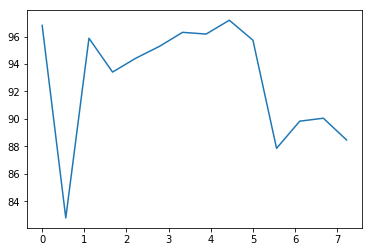

In [24]:
plt.plot(data['Time'], data['Temp (F)'])

### Reading all temperature in single frame

In [25]:
framearray = imarray[0]
alltempall = np.zeros((height, width))
row = 0
col = 0

while col < height :
    row = 0
    while row < width:
        temp = framearray[col, row]
        cels, fahr = to_temperature(temp)
        alltempall[col, row] = cels
        row += 1
    col += 1

In [26]:
print(alltempall)

[[26.78 26.69 26.51 ... 25.97 25.91 25.99]
 [26.86 26.61 26.57 ... 25.99 26.08 26.14]
 [26.67 26.59 26.67 ... 26.01 25.91 26.18]
 ...
 [27.98 27.47 27.53 ... 25.47 25.76 25.78]
 [27.78 27.53 27.66 ... 25.6  25.58 25.87]
 [27.72 27.62 27.51 ... 25.62 25.55 25.81]]
